In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262.0,19.0,7.0,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112.0,20.0,3.0,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243.0,22.0,17.0,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96.0,31.0,4.0,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68.0,22.0,15.0,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         16382 non-null  int64  
 1   sales_channel          16382 non-null  object 
 2   trip_type              16382 non-null  object 
 3   purchase_lead          16381 non-null  float64
 4   length_of_stay         16381 non-null  float64
 5   flight_hour            16381 non-null  float64
 6   flight_day             16381 non-null  object 
 7   route                  16381 non-null  object 
 8   booking_origin         16381 non-null  object 
 9   wants_extra_baggage    16381 non-null  float64
 10  wants_preferred_seat   16381 non-null  float64
 11  wants_in_flight_meals  16381 non-null  float64
 12  flight_duration        16381 non-null  float64
 13  booking_complete       16381 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.7+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri', nan], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([ 6.,  3.,  4.,  1.,  7.,  2.,  5., nan])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,16382.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000
mean,1.472287,86.618094,40.267932,8.891032,3.830169,0.767413,0.306453,0.487211,7.753264,0.106526
std,0.865432,86.515951,40.534052,5.482142,1.993878,0.422494,0.461034,0.499852,1.426825,0.308519
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,23.000000,21.000000,5.000000,2.000000,1.000000,0.000000,0.000000,6.620000,0.000000
50%,1.000000,56.000000,28.000000,9.000000,4.000000,1.000000,0.000000,0.000000,8.580000,0.000000
75%,2.000000,120.000000,42.000000,12.000000,6.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,641.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16381 entries, 0 to 16380
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         16381 non-null  int64  
 1   sales_channel          16381 non-null  object 
 2   trip_type              16381 non-null  object 
 3   purchase_lead          16381 non-null  float64
 4   length_of_stay         16381 non-null  float64
 5   flight_hour            16381 non-null  float64
 6   flight_day             16381 non-null  float64
 7   route                  16381 non-null  object 
 8   booking_origin         16381 non-null  object 
 9   wants_extra_baggage    16381 non-null  float64
 10  wants_preferred_seat   16381 non-null  float64
 11  wants_in_flight_meals  16381 non-null  float64
 12  flight_duration        16381 non-null  float64
 13  booking_complete       16381 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 1.9+ 

In [ ]:
df.sample(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
15347,2,Internet,RoundTrip,60.0,93.0,6.0,5.0,JHBKTM,Malaysia,1.0,0.0,0.0,4.75,1.0
3152,1,Internet,RoundTrip,89.0,23.0,0.0,6.0,CANMEL,Australia,1.0,0.0,1.0,8.83,0.0
15670,1,Internet,RoundTrip,21.0,88.0,10.0,3.0,JHBPUS,Malaysia,1.0,1.0,1.0,6.33,0.0
6515,2,Internet,RoundTrip,6.0,23.0,16.0,5.0,COKOOL,Australia,1.0,0.0,0.0,8.83,0.0
12457,1,Internet,RoundTrip,167.0,19.0,11.0,3.0,HNDMEL,Australia,0.0,0.0,0.0,8.83,0.0


In [ ]:
df.booking_complete.value_counts()

0.0    14636
1.0     1745
Name: booking_complete, dtype: int64

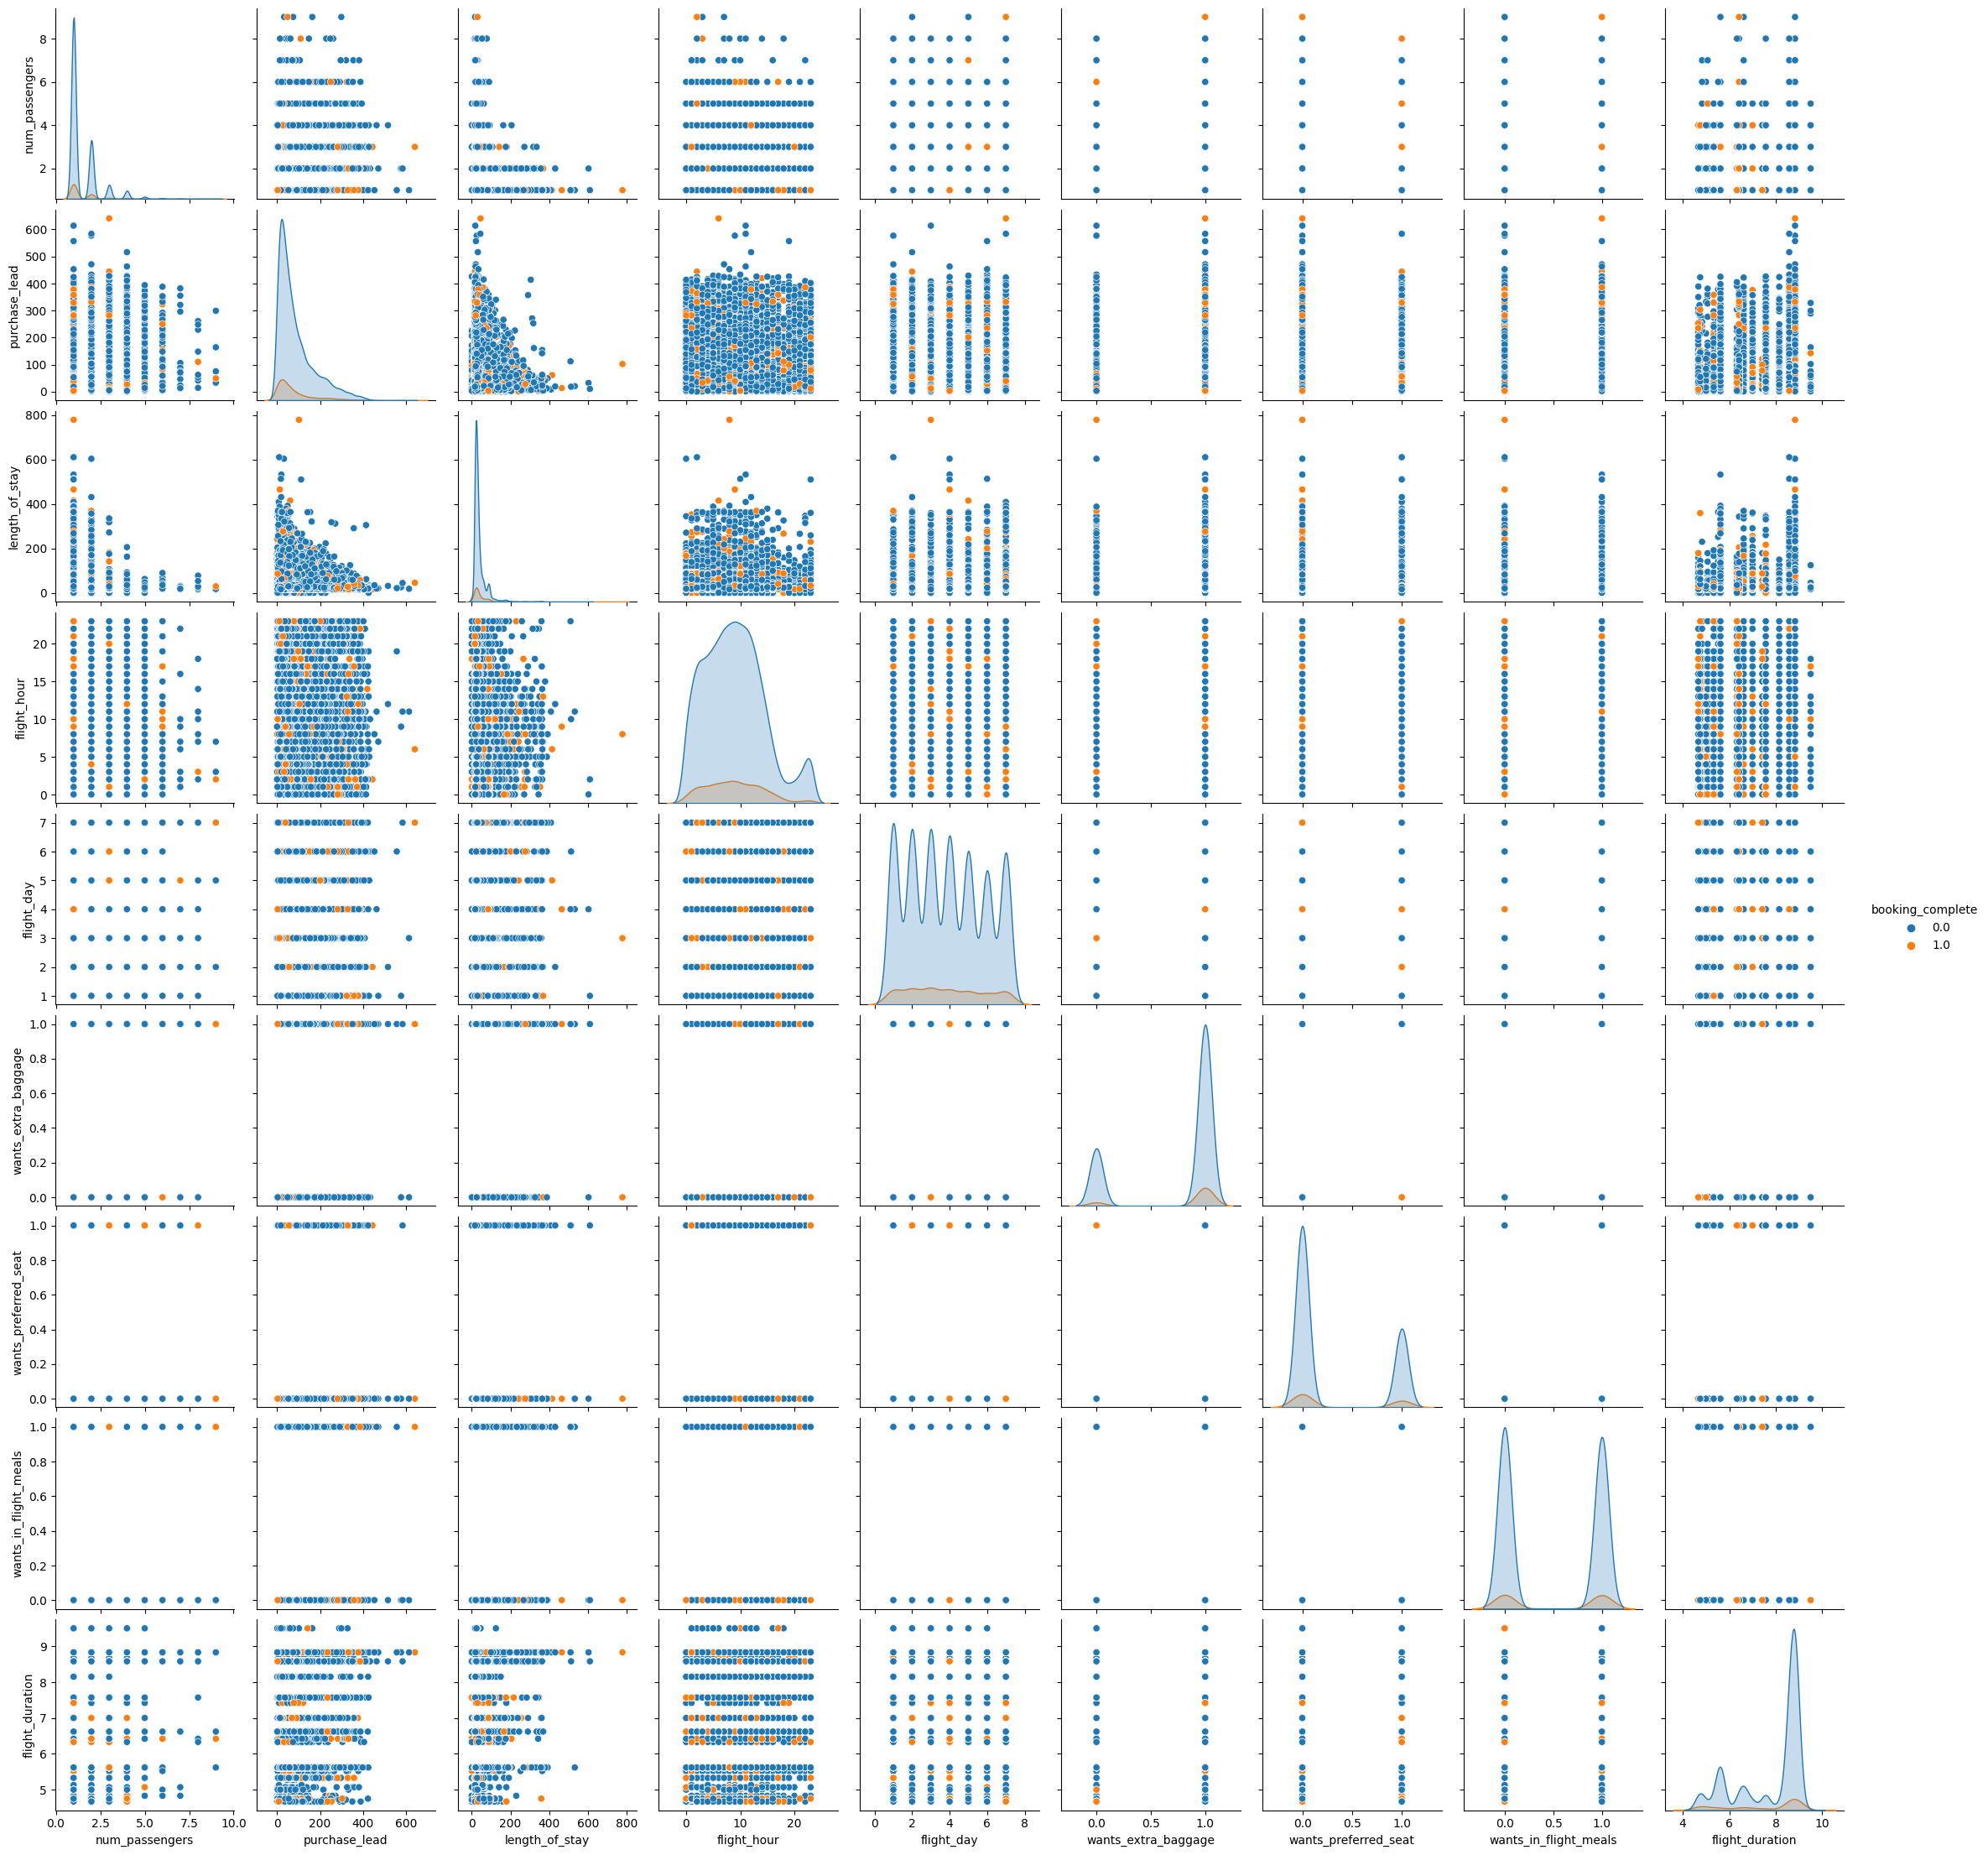

In [ ]:
sns.pairplot(df, hue='booking_complete')
plt.show()

<ipython-input-21-4b8fa9fc5e1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


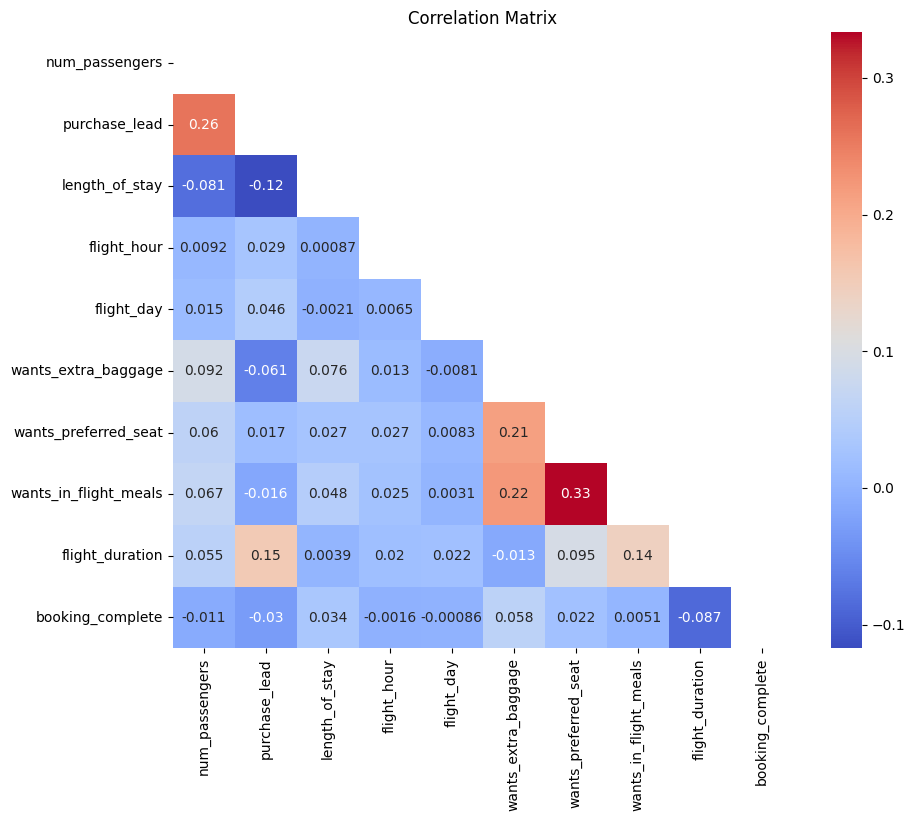

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

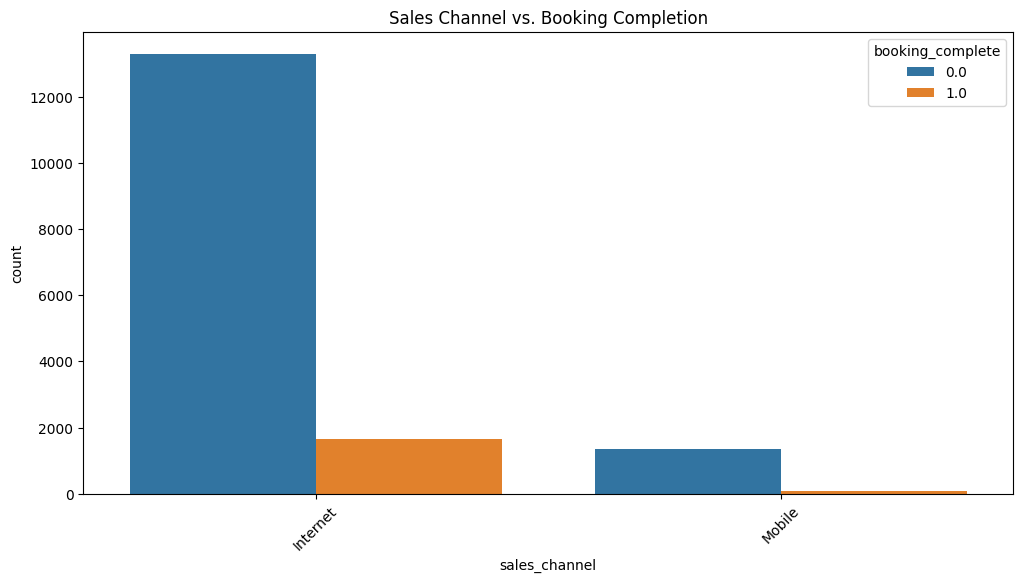

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sales_channel', hue='booking_complete')
plt.title('Sales Channel vs. Booking Completion')
plt.xticks(rotation=45)
plt.show()

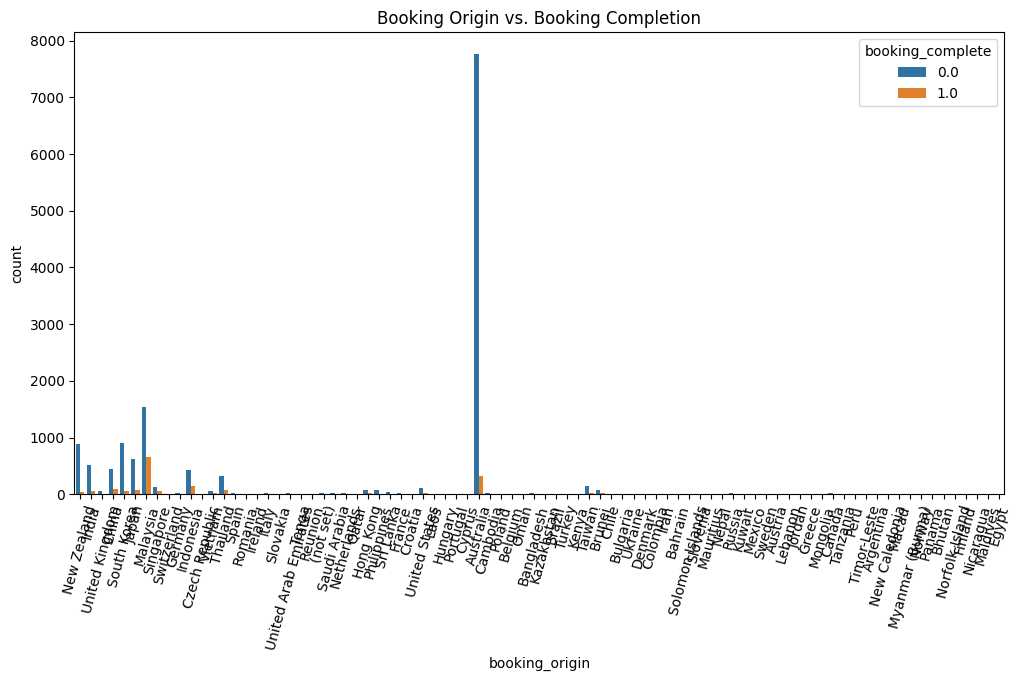

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='booking_origin', hue='booking_complete')
plt.title('Booking Origin vs. Booking Completion')
plt.xticks(rotation=75)
plt.show()

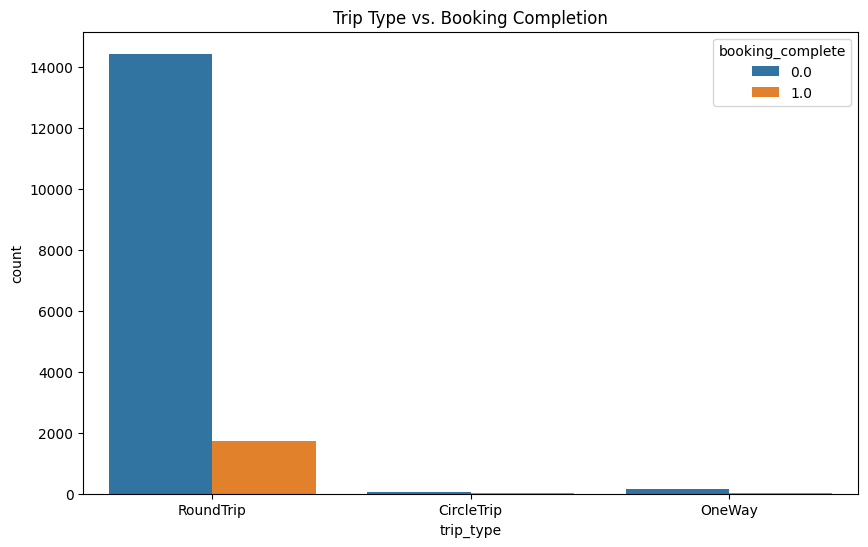

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='trip_type', hue='booking_complete')
plt.title('Trip Type vs. Booking Completion')
plt.show()

In [ ]:
grouped = df.groupby('booking_complete').mean()
print(grouped)

                  num_passengers  purchase_lead  length_of_stay  flight_hour  \
booking_complete                                                               
0.0                     1.475540      87.510317       39.798306     8.894097   
1.0                     1.445272      79.134670       44.206877     8.865330   

                  flight_day  wants_extra_baggage  wants_preferred_seat  \
booking_complete                                                          
0.0                 3.830760             0.758951              0.302952   
1.0                 3.825215             0.838395              0.335817   

                  wants_in_flight_meals  flight_duration  
booking_complete                                          
0.0                            0.486335         7.796094  
1.0                            0.494556         7.394034  


<ipython-input-28-7b80cd11f385>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('booking_complete').mean()


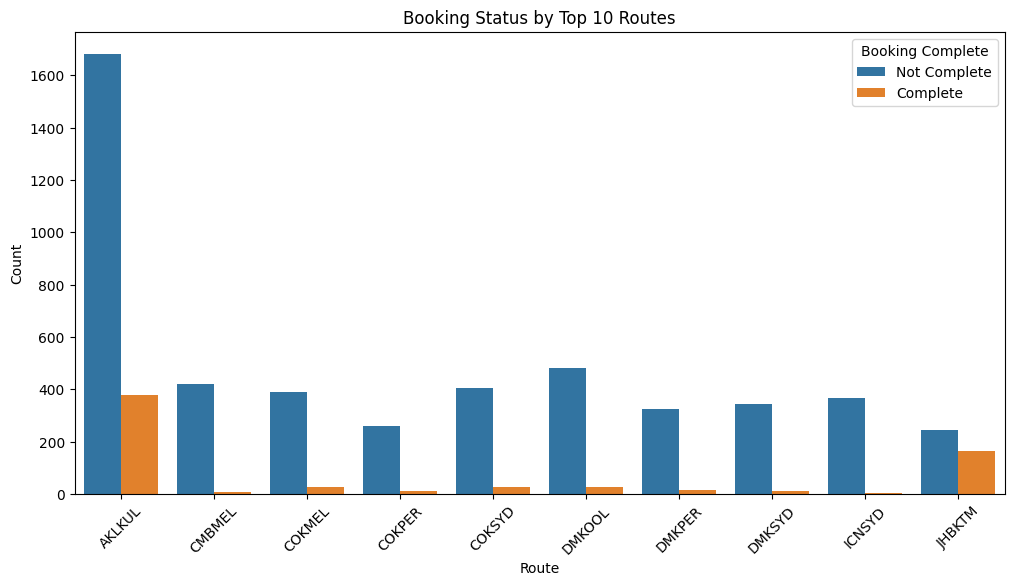

In [ ]:
top_10_routes = df['route'].value_counts().head(10).index

df_top_10_routes = df[df['route'].isin(top_10_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_routes, x='route', hue='booking_complete')
plt.title('Booking Status by Top 10 Routes')
plt.xticks(rotation=45)
plt.xlabel('Route')
plt.ylabel('Count')
plt.legend(title='Booking Complete', labels=['Not Complete', 'Complete'])
plt.show()


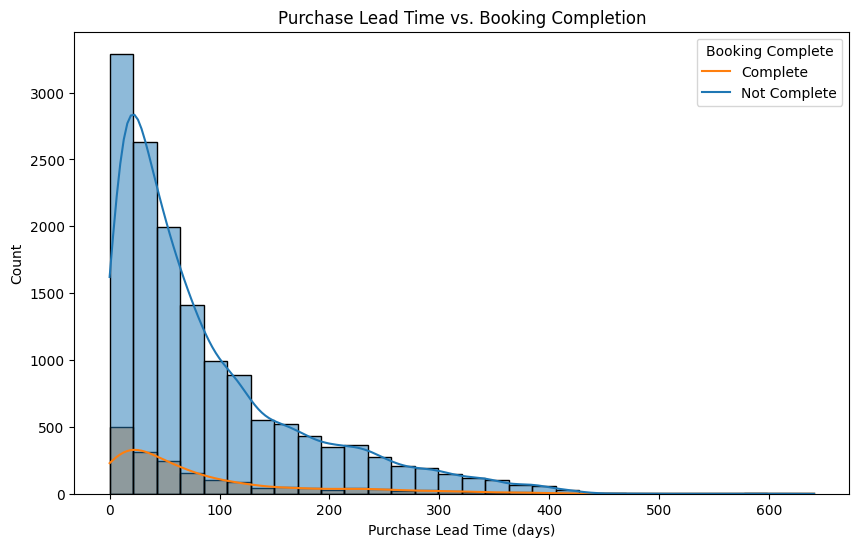

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='purchase_lead', hue='booking_complete', bins=30, kde=True)
plt.title('Purchase Lead Time vs. Booking Completion')
plt.xlabel('Purchase Lead Time (days)')
plt.ylabel('Count')
plt.legend(title='Booking Complete', labels=['Complete', 'Not Complete'])
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])
df['route'] = label_encoder.fit_transform(df['route'])


In [ ]:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type','booking_origin','route'])

In [ ]:
df.sample(5)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_451,route_452,route_453,route_454,route_455,route_456,route_457,route_458,route_459,route_460
1629,1,116.0,31.0,7.0,4.0,1.0,0.0,0.0,8.83,0.0,...,0,0,0,0,0,0,0,0,0,0
8109,2,50.0,26.0,14.0,7.0,1.0,0.0,0.0,5.52,0.0,...,0,0,0,0,0,0,0,0,0,0
5126,2,104.0,26.0,6.0,1.0,1.0,0.0,1.0,8.83,0.0,...,0,0,0,0,0,0,0,0,0,0
12870,1,3.0,21.0,12.0,6.0,0.0,0.0,0.0,7.57,0.0,...,0,0,0,0,0,0,0,0,0,0
9624,1,189.0,21.0,20.0,7.0,1.0,0.0,1.0,8.83,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
columns_to_scale = ['length_of_stay', 'purchase_lead', 'flight_duration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



In [ ]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# Define hyperparameter grids for both models
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

logreg_param_grid = {
    'C': [0.1, 1, 10],
}

# Initialize models
xgb_model = XGBClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)
logreg_grid_search = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid,
                                  scoring='accuracy', cv=5, n_jobs=-1)

# Fit the models with the best hyperparameters
xgb_grid_search.fit(X_train, y_train)
logreg_grid_search.fit(X_train, y_train)

# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_
best_logreg_model = logreg_grid_search.best_estimator_

# Predict using the best models
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_logreg = best_logreg_model.predict(X_test)

# Evaluate the models
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

xgb_precision = precision_score(y_test, y_pred_xgb)
logreg_precision = precision_score(y_test, y_pred_logreg)

xgb_recall = recall_score(y_test, y_pred_xgb)
logreg_recall = recall_score(y_test, y_pred_logreg)

xgb_f1 = f1_score(y_test, y_pred_xgb)
logreg_f1 = f1_score(y_test, y_pred_logreg)

xgb_roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
logreg_roc_auc = roc_auc_score(y_test, best_logreg_model.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print("XGBoost Model:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print(f"ROC AUC: {xgb_roc_auc}")

print("\nLogistic Regression Model:")
print(f"Accuracy: {logreg_accuracy}")
print(f"Precision: {logreg_precision}")
print(f"Recall: {logreg_recall}")
print(f"F1 Score: {logreg_f1}")
print(f"ROC AUC: {logreg_roc_auc}")


XGBoost Model:
Accuracy: 0.892578125
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.7939293440421722

Logistic Regression Model:
Accuracy: 0.892333984375
Precision: 0.3333333333333333
Recall: 0.0022727272727272726
F1 Score: 0.004514672686230248
ROC AUC: 0.7859253779590213


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


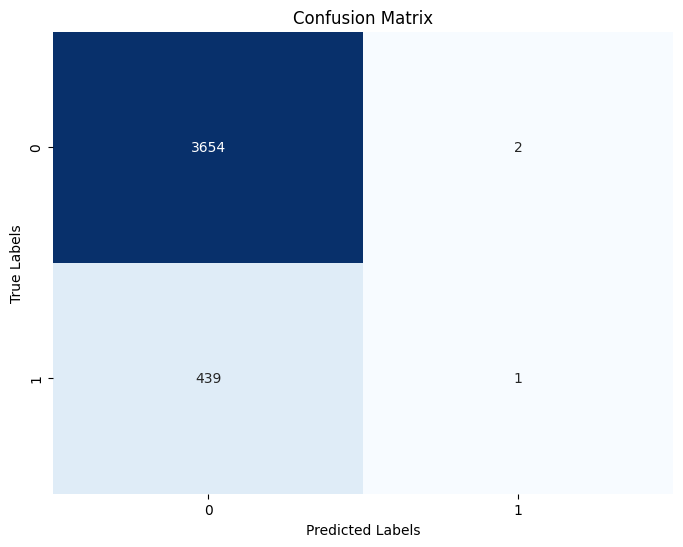

In [ ]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
#xgb_f1 = f1_score(y_test, y_pred_xgb)
#logreg_f1 = f1_score(y_test, y_pred_logreg)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

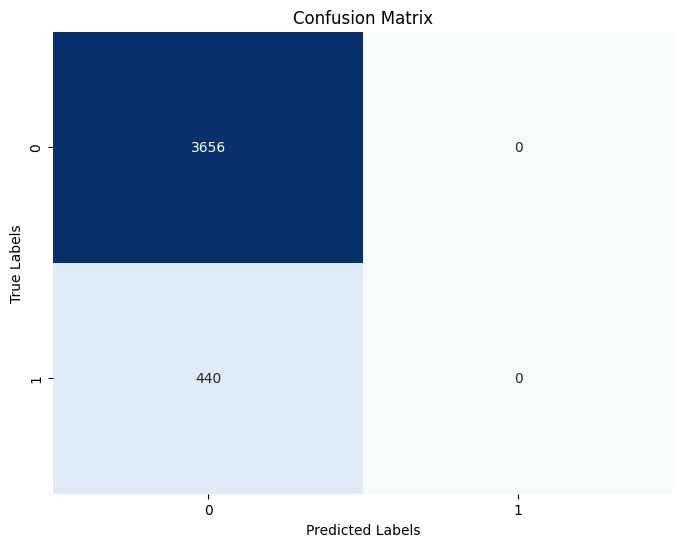

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

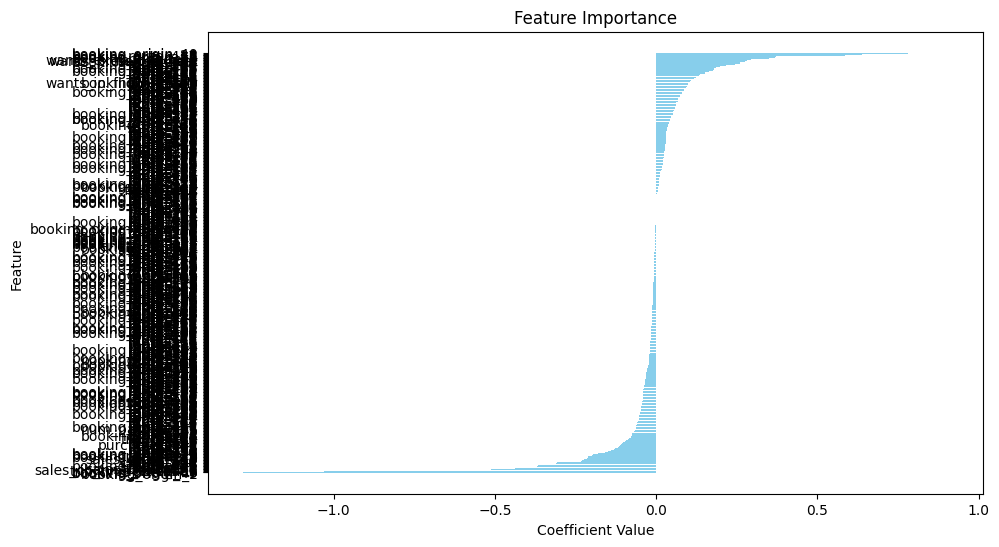

In [ ]:
# Get the coefficients (importance) of each feature
coefficients = best_logreg_model.coef_[0]

# Get the feature names (assuming X is a DataFrame)
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient values
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()
